# DBSCAN Example (Non-linear Clustering)
Here is demonstrated how to use the DBSCAN module from the `rice_ml` library to perform density-based clustering.\
In this example, a synthetically generated dataset with two moon-shaped clusters and noise will be used to train and evaluate the model.\
**Goal: Identify the two non-convex, distinct clusters within the data and correctly label scattered points as noise ($\mathbf{-1}$).**

In [2]:
import numpy as np
from sklearn.datasets import make_moons
from rice_ml.unsupervised_learning.dbscan import DBSCAN
from rice_ml.processing.preprocessing import standardize
import matplotlib.pyplot as plt

## 1. Load Data and Preparation
We use the `make_moons` dataset, which presents a challenge for geometric clustering methods like K-Means but is ideally suited for density-based methods.

In [4]:
# Generate synthetic non-linear data
X_raw, _ = make_moons(
    n_samples=250, 
    noise=0.08,  # Add noise to simulate real-world scatter
    random_state=67
)

print(f"Total Samples in Dataset: {X_raw.shape[0]}")

Total Samples in Dataset: 250


## 2. Data Pre-Processing: Scaling
Scaling is performed to ensure that the $\epsilon$ parameter is applied consistently across all feature dimensions.

In [5]:
# Standardization (Z-score scaling)
X_scaled = standardize(X_raw, return_params=False)
print(f"\nData scaled successfully using the standardize function.")


Data scaled successfully using the standardize function.


## 3. Initialize and Run the Model
Select appropriate values for eps and min_samples based on the density of the clusters in the normalized feature space.

In [6]:
# Initialize DBSCAN model
dbscan = DBSCAN(
    eps=0.2,       # A small radius for local density
    min_samples=7  # Require 7 points to form a dense core
)

print("\nBeginning DBSCAN Clustering...")

# Fit the model to the data (DBSCAN is an unsupervised algorithm)
dbscan.fit(X_scaled)

# Store the final labels
labels = dbscan.labels_
n_clusters = dbscan.n_clusters_

print("Clustering Complete.")
print(f"Clusters found (excluding noise): {n_clusters}")
print(f"Noise points (labeled -1): {np.sum(labels == -1)}")


Beginning DBSCAN Clustering...
Clustering Complete.
Clusters found (excluding noise): 12
Noise points (labeled -1): 55


## 4. Visualization of Results
Visualize the resulting clusters, using the special color black for the points labeled as noise (-1).

C:\Users\erida\AppData\Local\Temp\ipykernel_16748\716262828.py:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap('Spectral', n_unique_labels)


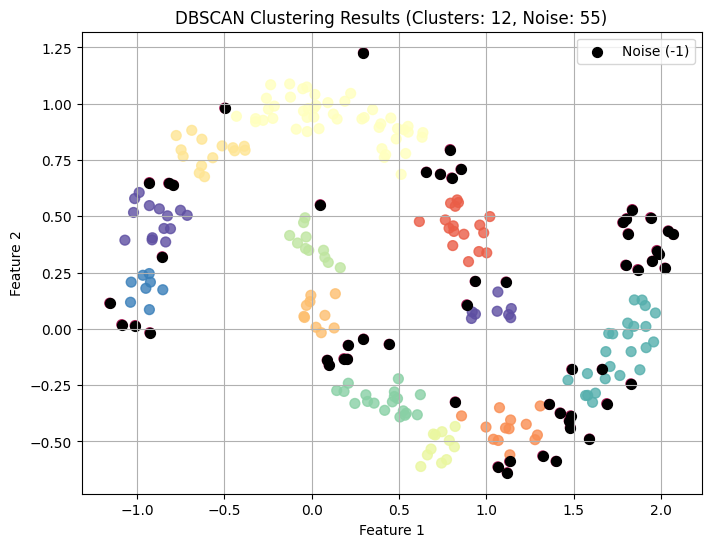

In [7]:
# Get the discovered community labels
labels = dbscan.labels_
n_clusters = dbscan.n_clusters_


# 1. Define the Number of Unique Clusters (excluding noise -1)
# Add 1 to include the noise label (-1) in the mapping range
n_unique_labels = len(np.unique(labels)) 

# 2. Create the Colormap
# We'll use a qualitative colormap like 'tab10' or 'Spectral'
# The '+1' is to accommodate the noise label in the range.
cmap = plt.cm.get_cmap('Spectral', n_unique_labels) 

plt.figure(figsize=(8, 6))

# 3. Use the Labels Array Directly with the Colormap
# We scatter the unscaled data (X_raw) for better physical interpretation.
# The 'c' parameter gets the labels, and 'cmap' maps the labels to colors.
plt.scatter(X_raw[:, 0], X_raw[:, 1], 
            c=labels,                  # Pass the numerical labels array
            cmap=cmap,                 # Pass the colormap object
            s=50, 
            alpha=0.8)

# 4. Set the Noise Color Manually (Black)
# Find the noise points (where label is -1) and plot them separately in black.
noise_mask = labels == -1
plt.scatter(X_raw[noise_mask, 0], X_raw[noise_mask, 1], 
            c='black', 
            s=50, 
            label='Noise (-1)') 

# Add title and labels
plt.title(f'DBSCAN Clustering Results (Clusters: {n_clusters}, Noise: {np.sum(labels == -1)})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.grid(True)
plt.show()